In [29]:
import pandas as pd

#Specifying Feature names from wdbc.names file
features_mean = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
                 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
features_se = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
               'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
features_worst = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
                  'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

column_names = ['ID', 'diagnosis'] + features_mean + features_se + features_worst

# Loading the dataset
df = pd.read_csv('wdbc.data', header=None, names=column_names)


In [30]:
print("First 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Info (data types, non-null counts):")
df.info()

print("\nDescriptive statistics for numerical features:")
print(df.describe())

First 5 rows of the DataFrame:
         ID diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_w

# **Observations:**

**Data Integrity:** The df.info() output confirms that there are no missing values across all 569 entries and 32 columns, which is excellent for data quality.

**Column Types:** Data types are correctly inferred: ID as an integer, diagnosis as an object (string), and all breast cancer features as floating-point numbers.

**Feature Scales:** df.describe() reveals a wide range of values and scales among the numerical features. For instance, area_mean has a maximum of 2501.0, while smoothness_mean has a maximum of 0.1634. This heterogeneity in scale indicates that feature scaling will be a necessary preprocessing step for many machine learning algorithms (e.g., those sensitive to feature magnitudes like K-Nearest Neighbors, Support Vector Machines, or Logistic Regression).

**ID Column:** The ID column is a unique identifier and holds no predictive value for the diagnosis task.

**Zero Values in Features:** The minimum values of 0 for features like concavity_mean, concave points_mean, concavity_se, and concave points_se suggest that some cell nuclei might genuinely lack concavities or concave points, or these features might not be present. This is normal and doesn't necessarily indicate an issue.

In [31]:
df_cleaned = df.drop('ID', axis=1) # axis=1 means drop column
print(f"\nDataFrame shape after dropping ID: {df_cleaned.shape}")


DataFrame shape after dropping ID: (569, 31)


# **Observations:**

The ID column has been successfully removed from the DataFrame, reducing the number of columns from 32 to 31. This is a good and necessary step as the ID column has no analytical value for prediction.

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_cleaned['diagnosis_encoded'] = le.fit_transform(df_cleaned['diagnosis'])
# Check the mapping: 0 for Benign, 1 for Malignant
print(f"\nDiagnosis mapping: {list(le.classes_)} -> {list(range(len(le.classes_)))}")
print(df_cleaned[['diagnosis', 'diagnosis_encoded']].head())

# Now you can drop the original 'diagnosis' column
df_cleaned = df_cleaned.drop('diagnosis', axis=1)


Diagnosis mapping: ['B', 'M'] -> [0, 1]
  diagnosis  diagnosis_encoded
0         M                  1
1         M                  1
2         M                  1
3         M                  1
4         M                  1


# **Observations:**

**Target Variable Transformation:** The categorical diagnosis column ('M' and 'B') has been successfully transformed into a numerical diagnosis_encoded column using LabelEncoder.

**Clear Mapping:** The output explicitly shows the mapping: 'B' (Benign) is encoded as 0, and 'M' (Malignant) is encoded as 1. This is a standard and interpretable representation for binary classification tasks.

The original diagnosis column has been dropped, ensuring that only the numerical target variable remains for model training.

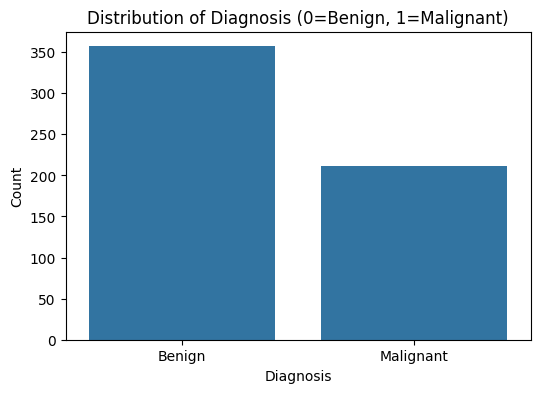


Value counts for diagnosis:
diagnosis_encoded
0    357
1    212
Name: count, dtype: int64
diagnosis_encoded
0    62.741652
1    37.258348
Name: proportion, dtype: float64


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis_encoded', data=df_cleaned)
plt.title('Distribution of Diagnosis (0=Benign, 1=Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'])
plt.show()

print("\nValue counts for diagnosis:")
print(df_cleaned['diagnosis_encoded'].value_counts())
print(df_cleaned['diagnosis_encoded'].value_counts(normalize=True) * 100)

# **Observations:**

**Class Imbalance:** The distribution clearly indicates a class imbalance. Approximately 62.74% of the cases are Benign (0), while 37.26% are Malignant (1). This is a moderate imbalance, which needs to be considered for model training and evaluation.

In [34]:
import numpy as np
from sklearn.model_selection import train_test_split

print("--- Quantify Skewness and Kurtosis ---")
# Exclude the target variable from skewness/kurtosis calculation for features
numerical_features = df_cleaned.drop('diagnosis_encoded', axis=1)

print("\nSkewness of numerical features:")
# Sort by absolute skewness to easily see the most skewed features
print(numerical_features.skew().sort_values(key=abs, ascending=False))

print("\nKurtosis of numerical features:")
# Sort by absolute kurtosis
print(numerical_features.kurt().sort_values(key=abs, ascending=False))


--- Quantify Skewness and Kurtosis ---

Skewness of numerical features:
area_se                    5.447186
concavity_se               5.110463
fractal_dimension_se       3.923969
perimeter_se               3.443615
radius_se                  3.088612
smoothness_se              2.314450
symmetry_se                2.195133
compactness_se             1.902221
area_worst                 1.859373
fractal_dimension_worst    1.662579
texture_se                 1.646444
area_mean                  1.645732
compactness_worst          1.473555
concave points_se          1.444678
symmetry_worst             1.433928
concavity_mean             1.401180
fractal_dimension_mean     1.304489
compactness_mean           1.190123
concave points_mean        1.171180
concavity_worst            1.150237
perimeter_worst            1.128164
radius_worst               1.103115
perimeter_mean             0.990650
radius_mean                0.942380
symmetry_mean              0.725609
texture_mean               0

# **Overall Observation:**

The numerical features in this dataset generally exhibit positive skewness and positive kurtosis. This means their distributions are often asymmetrical, with tails extending to the right, and are more peaked with heavier tails (more outliers) compared to a normal distribution. These characteristics suggest that feature transformations might be beneficial for some features, and robust scaling or outlier handling should be considered before training certain machine learning models.

In [35]:
!pip install imbalanced-learn


--- Applying SMOTE for Class Imbalance ---
Original training set shape: (455, 30)
Original training target distribution: Counter({0: 285, 1: 170})
Resampled training set shape: (570, 30)
Resampled training target distribution: Counter({1: 285, 0: 285})


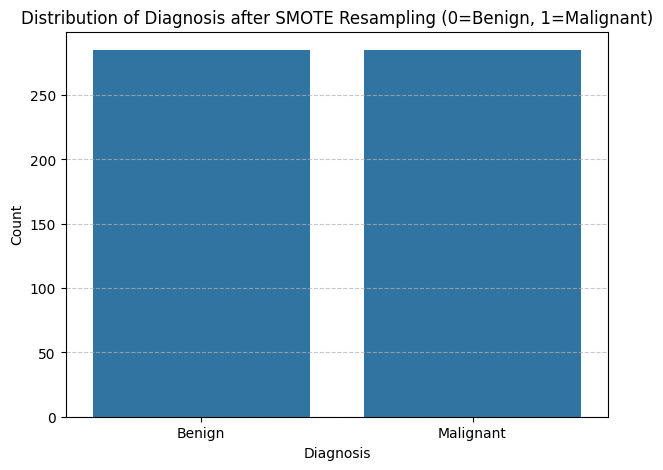

In [36]:
from collections import Counter
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt


print("\n--- Applying SMOTE for Class Imbalance ---")

# Check original class distribution in training data
print(f"Original training set shape: {X_train.shape}")
print(f"Original training target distribution: {Counter(y_train)}")

# Apply SMOTE to the training data
# random_state ensures reproducibility of the synthetic samples
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution after SMOTE
print(f"Resampled training set shape: {X_train_resampled.shape}")
print(f"Resampled training target distribution: {Counter(y_train_resampled)}")

# --- Visualization of Resampled Distribution ---
plt.figure(figsize=(7, 5))
sns.countplot(x=y_train_resampled)
plt.title('Distribution of Diagnosis after SMOTE Resampling (0=Benign, 1=Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **Observations:**
**Initial Imbalance:** The training set initially showed an imbalance with 285 Benign (0) samples and 170 Malignant (1) samples.

**SMOTE Effect:** SMOTE successfully oversampled the minority (Malignant) class by generating synthetic samples.

**Resulting Balance:** This resulted in a perfectly balanced training dataset, with 285 samples for both Benign (0) and Malignant (1) classes, totaling 570 samples.

**Significance:** This balancing is crucial to prevent model bias towards the majority class and improve the model's ability to accurately predict the minority (Malignant) cases. The provided plot visually confirms this balanced distribution.

In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

if not isinstance(X_train_resampled, pd.DataFrame):
    X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=X_test.columns)

print("--- Applying Feature Scaling ---")

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the resampled training data ONLY
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)

# Transform both the resampled training data and the original test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames for easier manipulation and analysis
X_train_resampled_scaled = pd.DataFrame(X_train_resampled_scaled, columns=X_train_resampled.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print(f"Shape of X_train_resampled_scaled: {X_train_resampled_scaled.shape}")
print(f"Shape of X_test_scaled: {X_test_scaled.shape}")
print("\nFirst 5 rows of X_train_resampled_scaled:")
print(X_train_resampled_scaled.head())
print("\nFeature scaling complete.")

--- Applying Feature Scaling ---
Shape of X_train_resampled_scaled: (570, 30)
Shape of X_test_scaled: (114, 30)

First 5 rows of X_train_resampled_scaled:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     0.317569      0.799521        0.223813   0.195305        -1.105674   
1    -0.680240     -1.787252       -0.706424  -0.689206         0.415420   
2    -0.537310      0.353690       -0.558990  -0.555615        -1.586058   
3     0.015530      0.630248        0.200411  -0.103685         0.171194   
4     1.016036      0.086668        0.980484   0.980419        -0.200645   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0         -0.824194       -0.844314            -0.574331      -1.158235   
1         -0.767935       -0.761948            -0.482388       0.427529   
2         -0.527210       -0.505868            -0.929419      -0.966913   
3          1.985347        2.032656             0.983570       0.729229   
4         -0.

# **Observation:**
**Consistent Scaling:** Both X_train_resampled_scaled and X_test_scaled now have shapes of (570, 30) and (114, 30) respectively, meaning all 30 features have been scaled in both the training and testing sets.

**Transformed Values:** Looking at the First 5 rows of X_train_resampled_scaled, you can observe that the numerical values across all features are now much smaller and centered around zero (e.g., values like 0.317, -0.680, 0.799, -1.787, etc.). This is exactly what StandardScaler does: it transforms the data to have a mean of 0 and a standard deviation of 1.

**Prepared for Modeling:** This step is crucial because it ensures that all features contribute equally to the model training process, preventing features with larger numerical ranges from dominating algorithms that are sensitive to scale (such as Logistic Regression, Support Vector Machines, K-Nearest Neighbors, and Neural Networks).

--- Visualizing Feature Distributions (Histograms & KDEs) ---


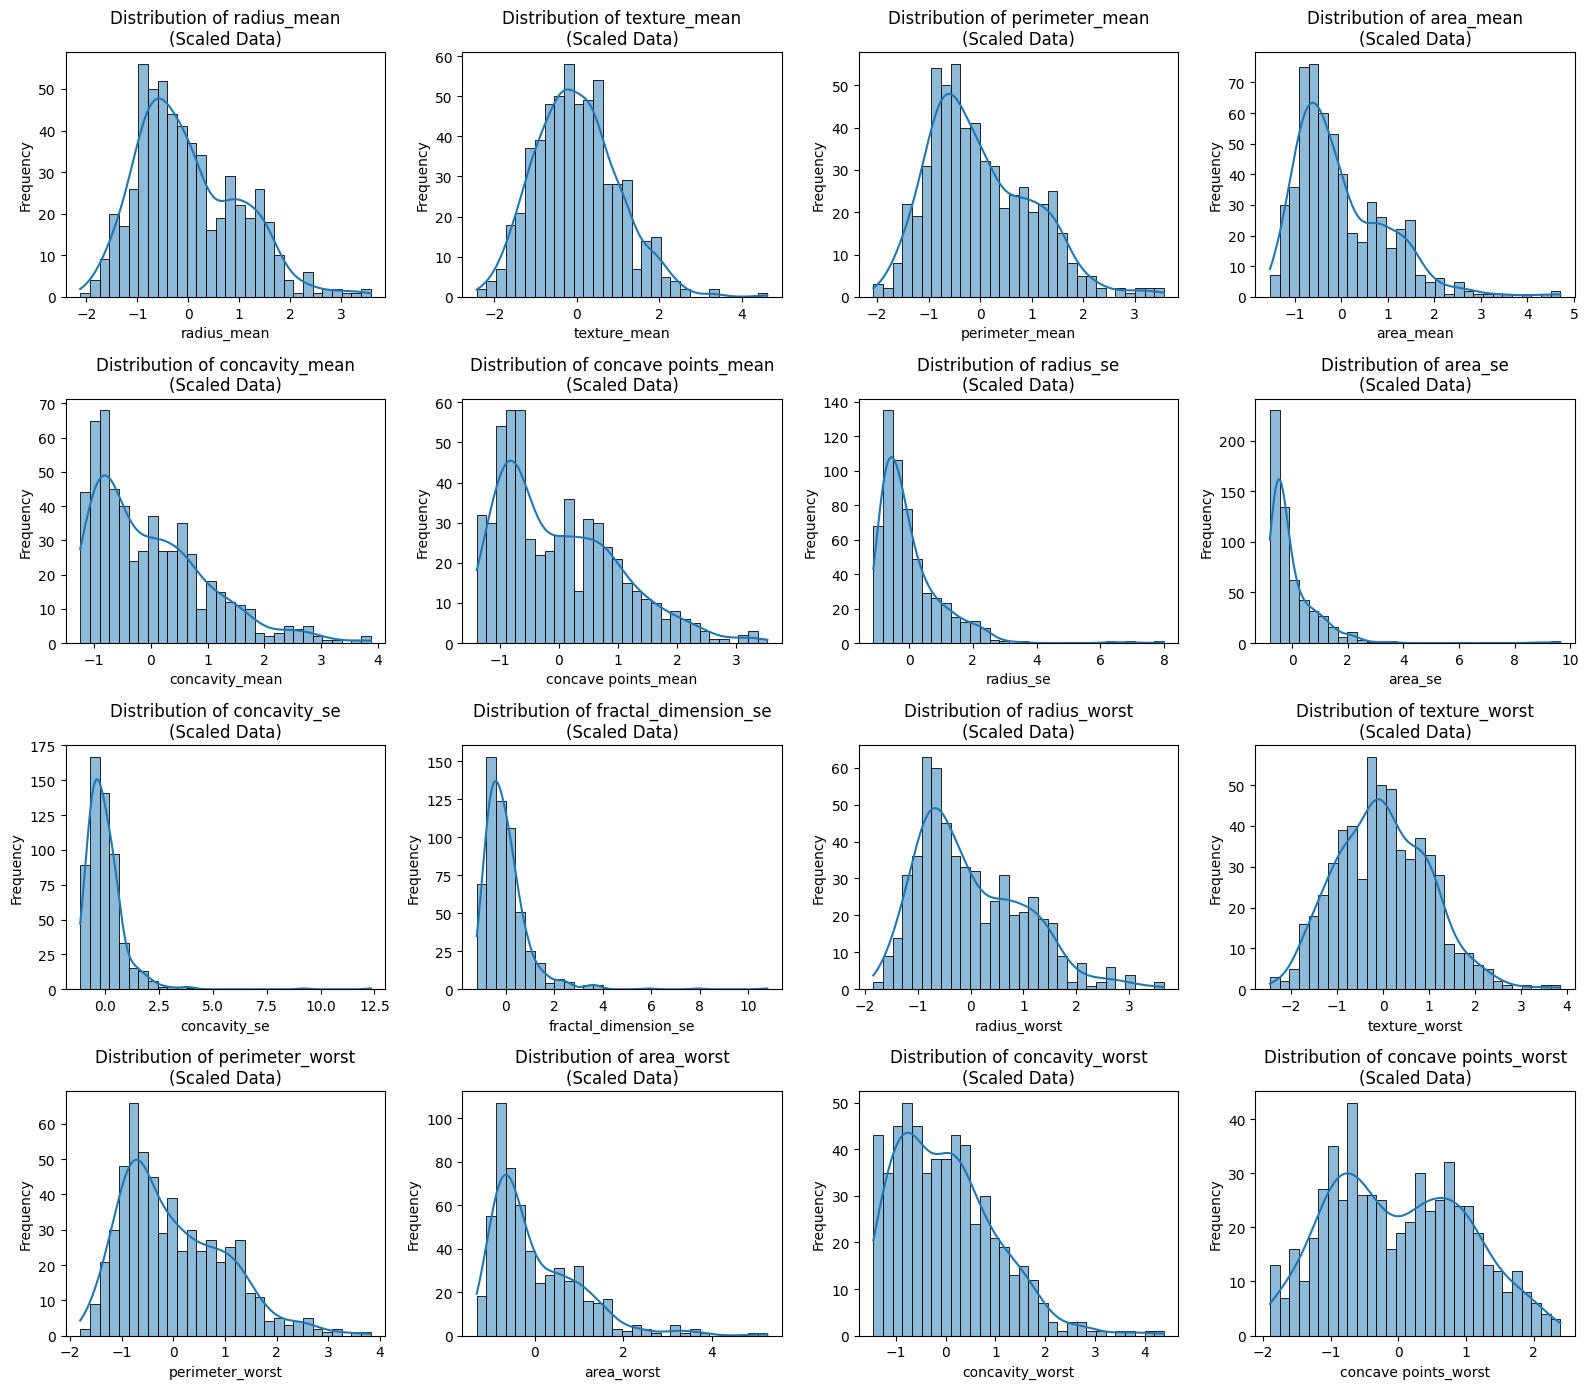


Distributions of selected scaled features visualized.
Observe their shapes, peaks, and tails. Note if highly skewed features still appear skewed.


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Visualizing Feature Distributions (Histograms & KDEs) ---")


features_to_plot = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'concavity_mean', 'concave points_mean',
    'radius_se', 'area_se', 'concavity_se', 'fractal_dimension_se', # Examples of highly skewed 'se' features
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
    'concavity_worst', 'concave points_worst'
]

# Determine grid size dynamically based on number of features to plot
num_features = len(features_to_plot)
n_cols = 4
n_rows = (num_features + n_cols - 1) // n_cols # Calculate rows needed

plt.figure(figsize=(n_cols * 4, n_rows * 3.5)) # Adjust figure size based on grid
for i, feature in enumerate(features_to_plot):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(X_train_resampled_scaled[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}\n(Scaled Data)')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("\nDistributions of selected scaled features visualized.")
print("Observe their shapes, peaks, and tails. Note if highly skewed features still appear skewed.")

# **Observations from the Feature Distribution Graph:**

**Confirmation of Skewness:** Many features, particularly those related to "standard error" (e.g., radius_se, area_se, concavity_se, fractal_dimension_se), still exhibit a clear positive skewness, even after scaling. This aligns with the high positive skewness values we observed numerically. Their distributions are concentrated on the left with a long tail extending to the right, indicating a prevalence of smaller values with occasional larger values.

**Confirmation of Kurtosis/Outliers:** Features like area_se, concavity_se, fractal_dimension_se, and perimeter_se not only appear skewed but also quite peaked with heavy tails, which is indicative of high kurtosis. This suggests the continued presence of outliers or extreme values in these features, even after standardization.

**Varying Degrees of Normality:** While some features (e.g., radius_mean, texture_mean, smoothness_mean, texture_worst, smoothness_worst) appear to be more symmetrically distributed and closer to a normal (bell-shaped) curve after scaling, many still deviate significantly.

**Scaling Effect:** The graphs now show features mostly centered around 0, with values typically ranging between -2 and 2 or -3 and 3, confirming that the StandardScaler has effectively scaled the data. However, scaling alone does not change the shape of the distribution (skewness or kurtosis).

**In summary:** The visualizations confirm that while scaling has normalized the range of values, the underlying distributions of many features, especially the _se (standard error) features, remain highly skewed and leptokurtic (heavy-tailed), suggesting the presence of outliers and potential benefits from further transformations for certain models.



--- Visualizing Outliers with Box Plots ---


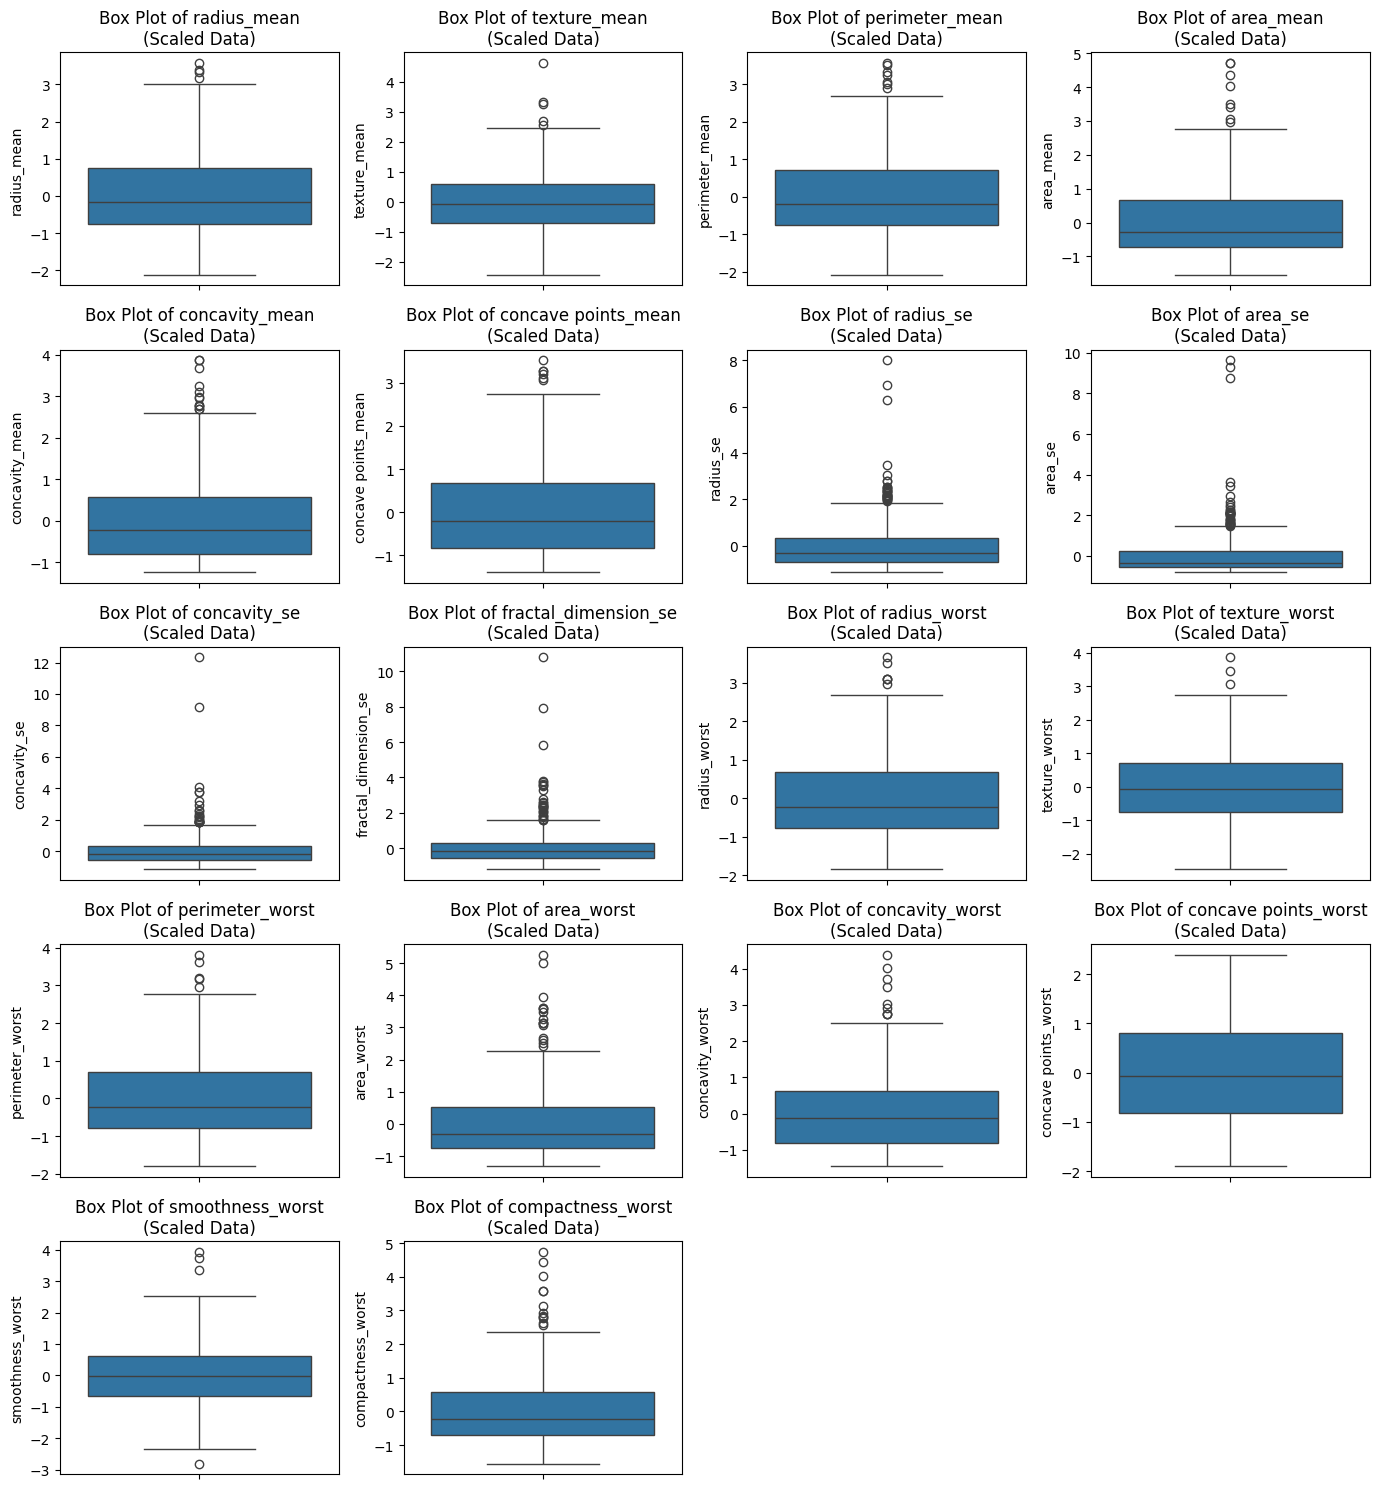


Box plots for selected scaled features generated.
Dots outside the whiskers represent potential outliers.


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print("--- Visualizing Outliers with Box Plots ---")

# identified with high kurtosis or potentially high practical impact.
features_for_outliers = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'concavity_mean', 'concave points_mean',
    'radius_se', 'area_se', 'concavity_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
    'concavity_worst', 'concave points_worst',
    'smoothness_worst', 'compactness_worst'
]

# Determine grid size dynamically
num_features_outliers = len(features_for_outliers)
n_cols_outliers = 4
n_rows_outliers = (num_features_outliers + n_cols_outliers - 1) // n_cols_outliers

plt.figure(figsize=(n_cols_outliers * 3.5, n_rows_outliers * 3)) # Adjust figure size
for i, feature in enumerate(features_for_outliers):
    plt.subplot(n_rows_outliers, n_cols_outliers, i + 1)
    sns.boxplot(y=X_train_resampled_scaled[feature])
    plt.title(f'Box Plot of {feature}\n(Scaled Data)')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

print("\nBox plots for selected scaled features generated.")
print("Dots outside the whiskers represent potential outliers.")

# **Observations from the Box Plot Graph:**

**Prevalence of Outliers:**

A significant number of features display numerous individual data points (represented as dots) extending far beyond the whiskers of the box plots. This clearly indicates the presence of outliers in many of your features, even after standardization.

Features like area_mean, radius_se, area_se, concavity_se, fractal_dimension_se, radius_worst, area_worst, and concavity_worst show particularly dense clusters of outliers on the higher side. This aligns perfectly with our earlier observations of high positive skewness and kurtosis for these features.

**Skewness Visually Confirmed:**

For many features (especially those with many outliers), the median line within the box is often not centered, and the whisker on the upper side (towards positive values) is longer, consistent with the positive skewness we discussed. This shows that the bulk of the data is concentrated towards the lower end, with a few very high values pulling the mean and extending the tail.

**Varying Spread:**

The height of the boxes (representing the Interquartile Range, IQR) varies across features, showing different degrees of data spread around the median for the central 50% of the data.

**In summary:** The box plots provide strong visual evidence of outliers across many features, particularly the _se (standard error) and _worst features. These outliers are largely responsible for the high positive skewness and kurtosis observed previously.

--- Generating Correlation Matrix Heatmap ---


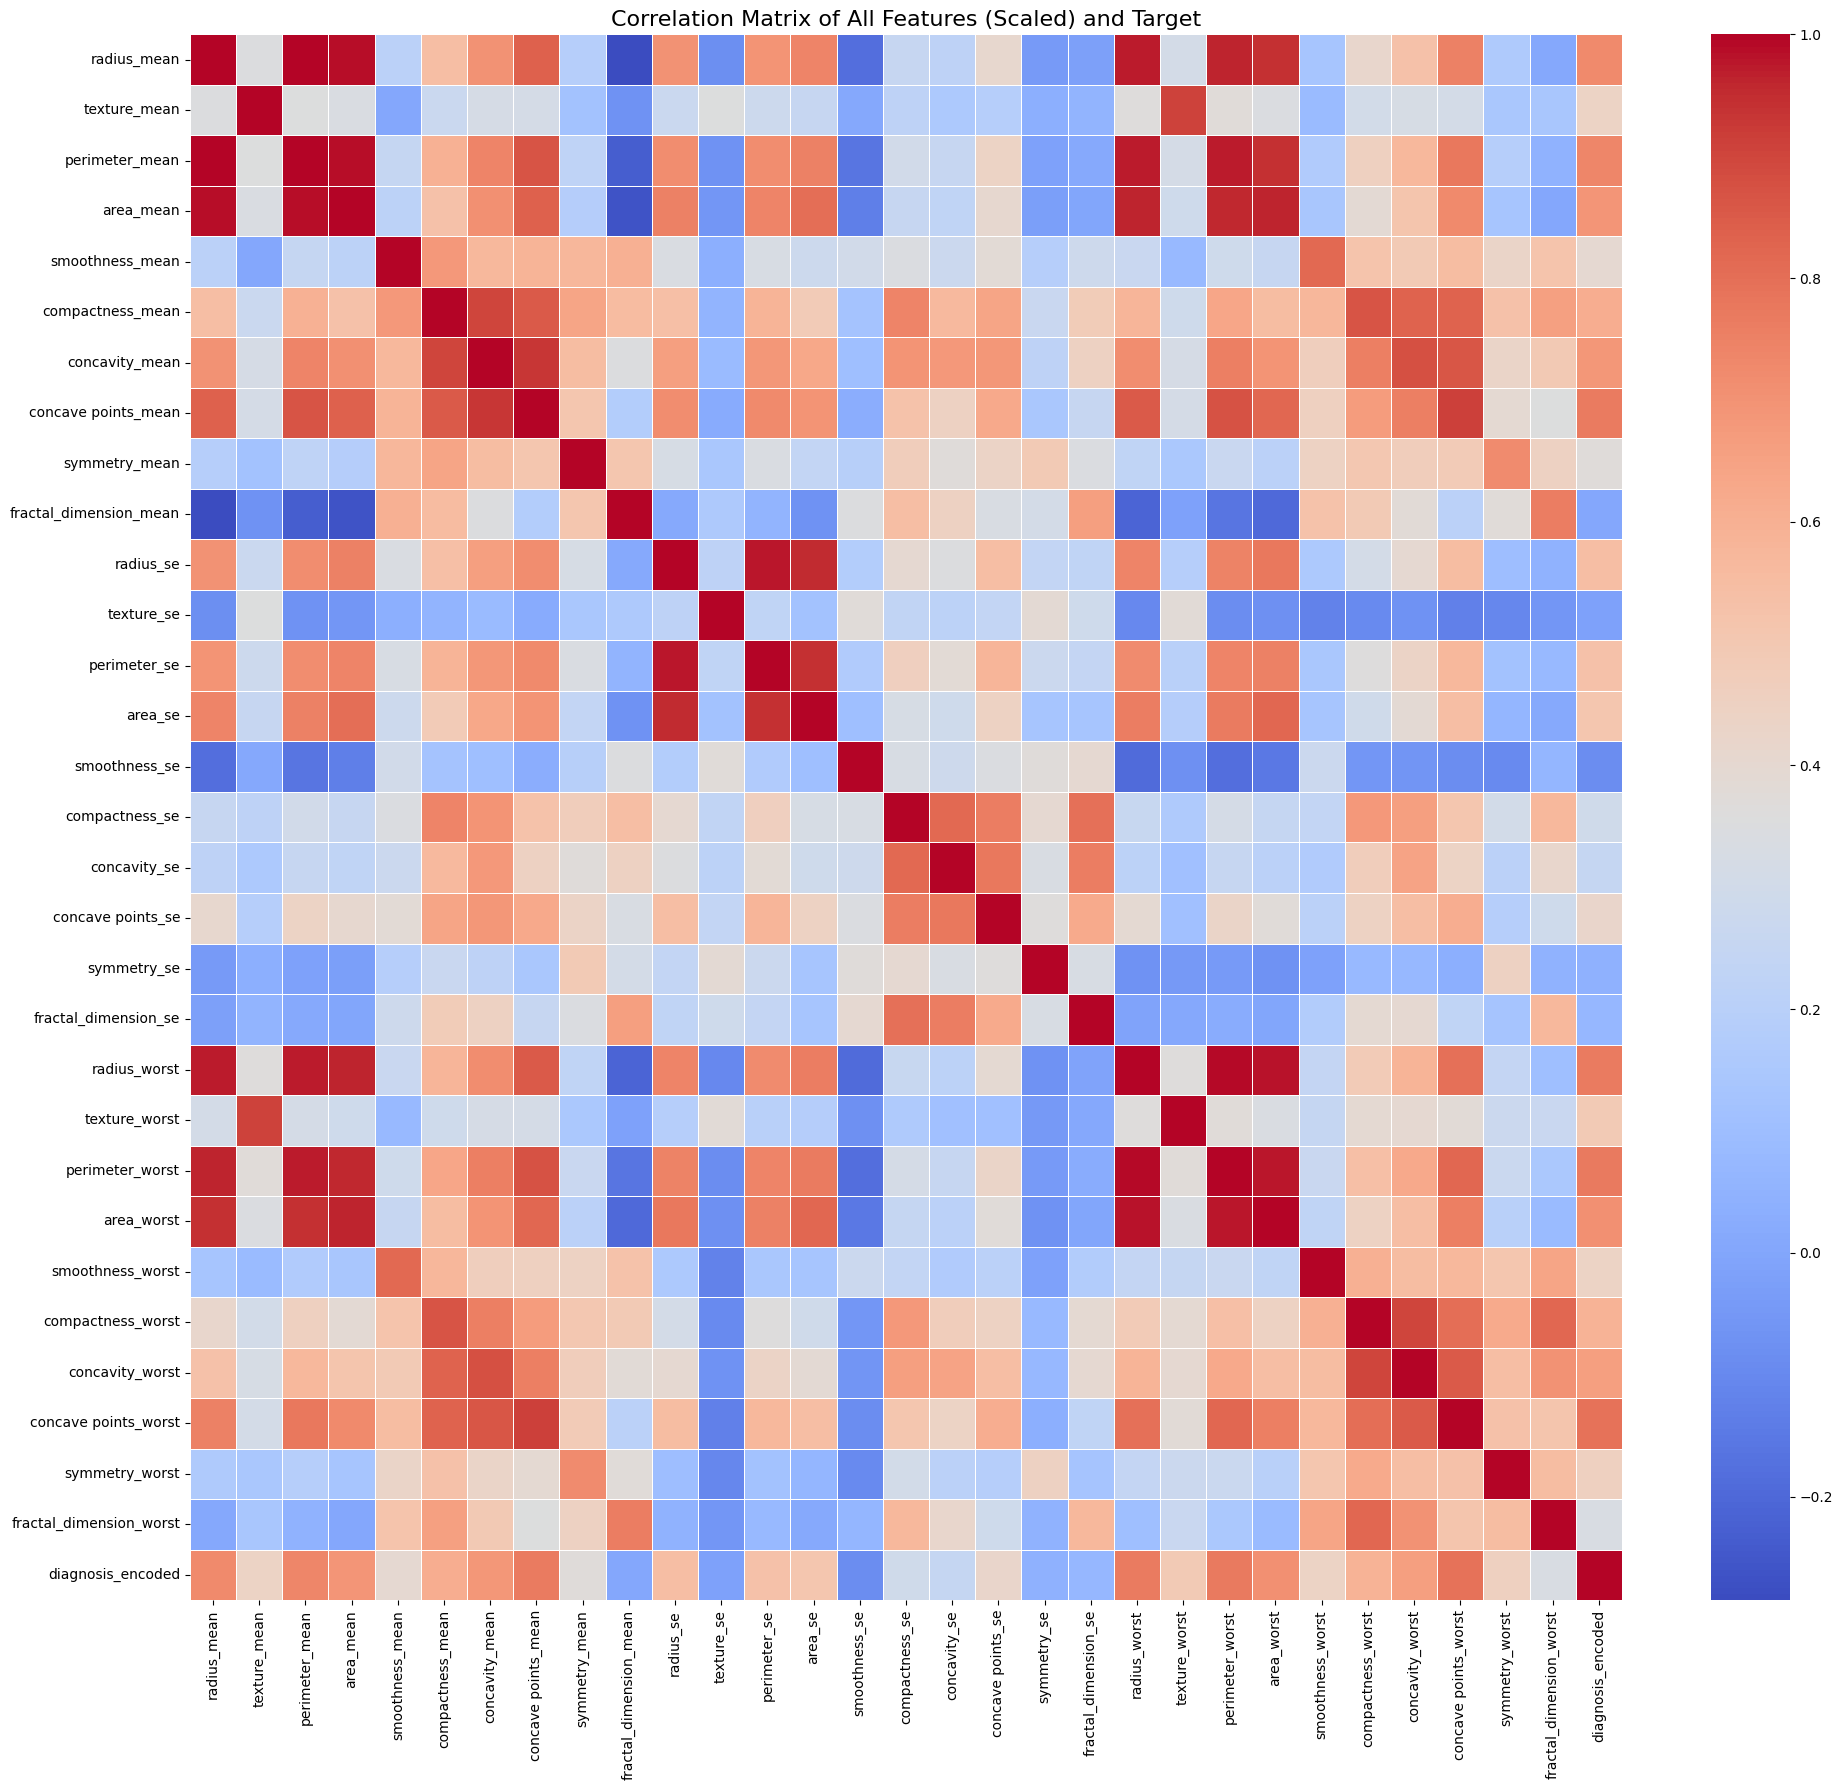


Top 10 features most correlated with 'diagnosis_encoded':
concave points_worst    0.793867
perimeter_worst         0.770854
concave points_mean     0.768606
radius_worst            0.765886
perimeter_mean          0.735501
radius_mean             0.724604
area_worst              0.707439
area_mean               0.689851
concavity_mean          0.687452
concavity_worst         0.660826
Name: diagnosis_encoded, dtype: float64


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print("--- Generating Correlation Matrix Heatmap ---")

train_data_corr = pd.concat([X_train_resampled_scaled, y_train_resampled], axis=1)

plt.figure(figsize=(20, 18))
sns.heatmap(train_data_corr.corr(), annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of All Features (Scaled) and Target', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# To get the top correlations with the target variable (diagnosis_encoded)
print("\nTop 10 features most correlated with 'diagnosis_encoded':")
# Exclude the correlation of 'diagnosis_encoded' with itself, and sort
print(train_data_corr.corr()['diagnosis_encoded'].drop('diagnosis_encoded').sort_values(ascending=False).head(10))


# **Observations from Correlation Analysis Output:**
**Strong Positive Correlations with Diagnosis:**

Features like concave points_worst (0.79), perimeter_worst (0.77), concave points_mean (0.76), radius_worst (0.76), perimeter_mean (0.73), and radius_mean (0.72) show very strong positive correlations with diagnosis_encoded.

This means that higher values in these features are strongly associated with a Malignant (1) diagnosis, and lower values are associated with a Benign (0) diagnosis. These are likely to be very important predictive features.

**Dominance of 'Mean' and 'Worst' Features:**

The top 10 list is predominantly composed of 'mean' and 'worst' features (e.g., radius_mean, radius_worst, perimeter_mean, perimeter_worst, area_mean, area_worst, concave points_mean, concave points_worst, concavity_mean, concavity_worst).

The 'standard error' (_se) features, which often showed high skewness and kurtosis, are not among the very top directly correlated features with the diagnosis, although they might still play a role or be highly correlated with each other.

Overall Strong Predictors: The high correlation values (many above 0.7) suggest that these features, individually, have significant predictive power for breast cancer diagnosis.

**Observations from the Heatmap:**
**High Inter-Feature Correlation (Multicollinearity):**

The heatmap clearly shows clusters of highly correlated features. For instance, radius_mean, perimeter_mean, and area_mean are very highly correlated with each other, as are their _worst counterparts (radius_worst, perimeter_worst, area_worst). The same applies to concavity_mean and concave points_mean, and their _worst versions.

This phenomenon is known as multicollinearity. While it doesn't always hurt a model's predictive performance, it can make the interpretation of individual feature importances difficult for certain models (e.g., linear regression, logistic regression) and potentially lead to less stable coefficient estimates.

**Visual Confirmation of Target Correlation:**

The column corresponding to diagnosis_encoded clearly shows strong red (positive correlation) squares with the features you listed numerically, visually confirming their strong association with malignancy.

**In summary:** We have identified several highly predictive features for the diagnosis. However, the presence of significant multicollinearity among these features is a key observation.


--- Applying Feature Transformation (Log1p) to Other Highly Skewed Features ---
This step identifies and transforms additional highly skewed features using log1p.
The goal is to make their distributions more symmetrical, which can benefit some models.

Processing feature: 'area_se'


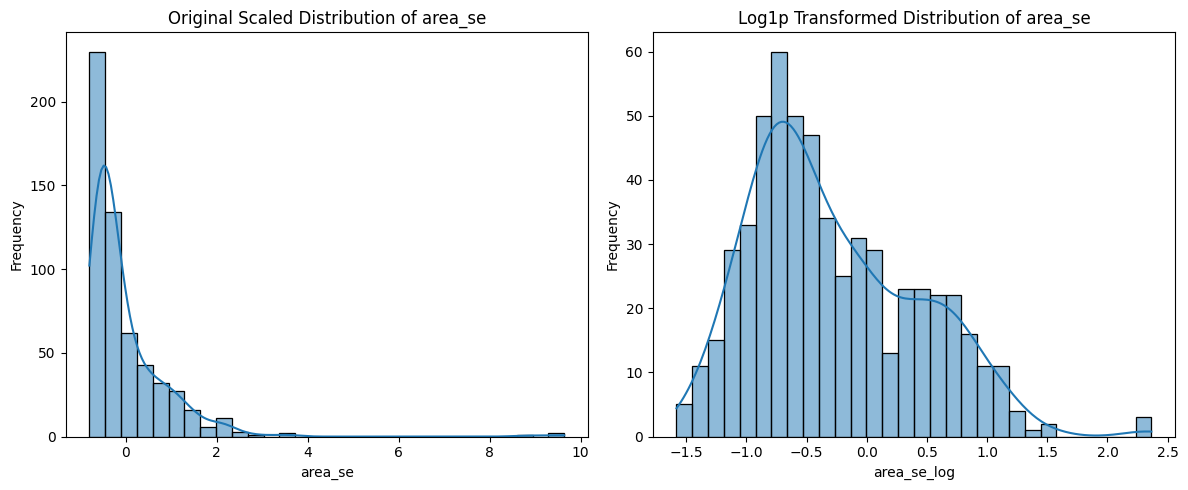

  Skewness of original scaled 'area_se': 4.81
  Skewness of log1p transformed 'area_se': 0.68

Processing feature: 'concavity_se'


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


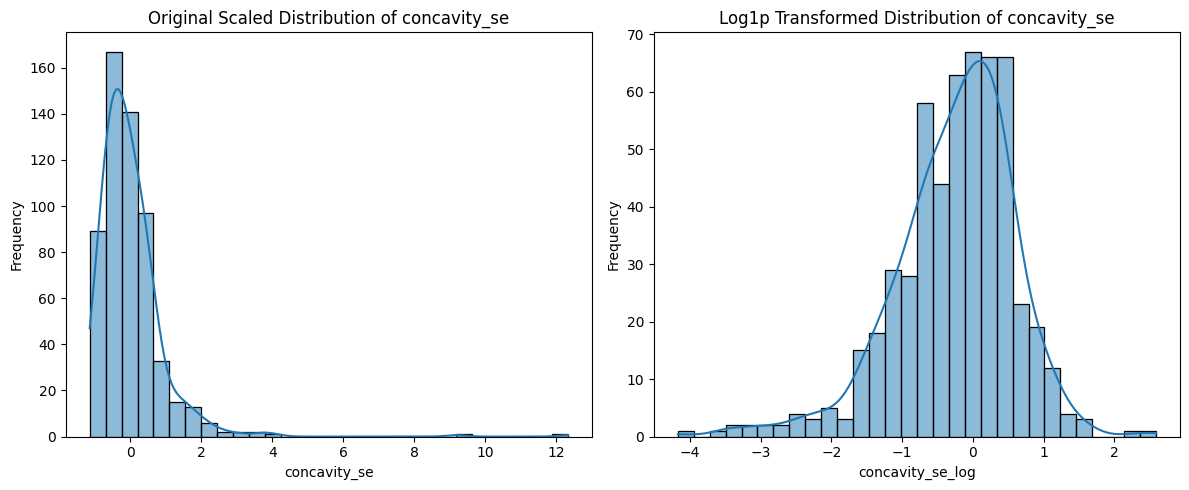

  Skewness of original scaled 'concavity_se': 5.30
  Skewness of log1p transformed 'concavity_se': -0.85

Processing feature: 'fractal_dimension_se'


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


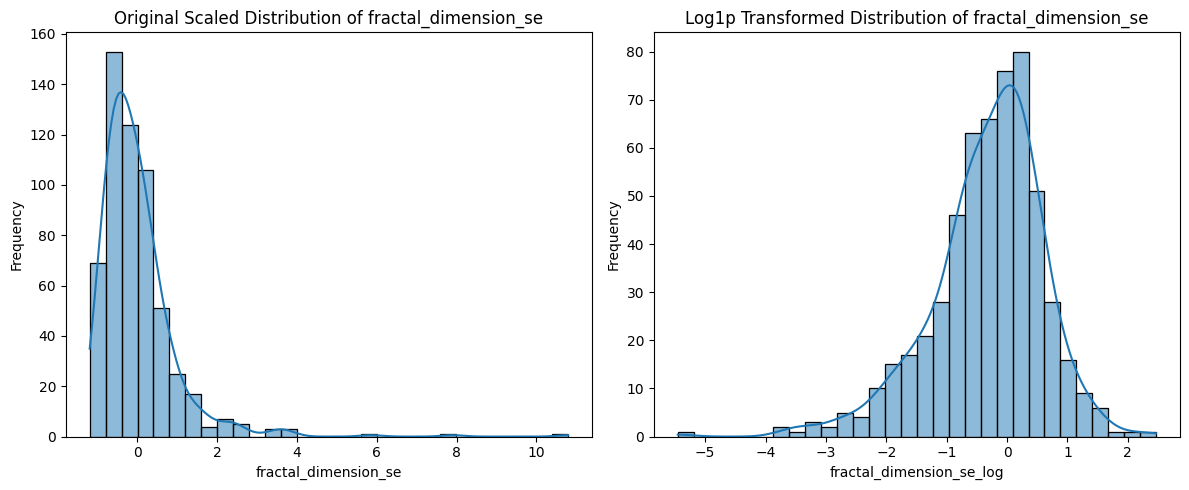

  Skewness of original scaled 'fractal_dimension_se': 4.23
  Skewness of log1p transformed 'fractal_dimension_se': -0.93

Processing feature: 'perimeter_se'


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


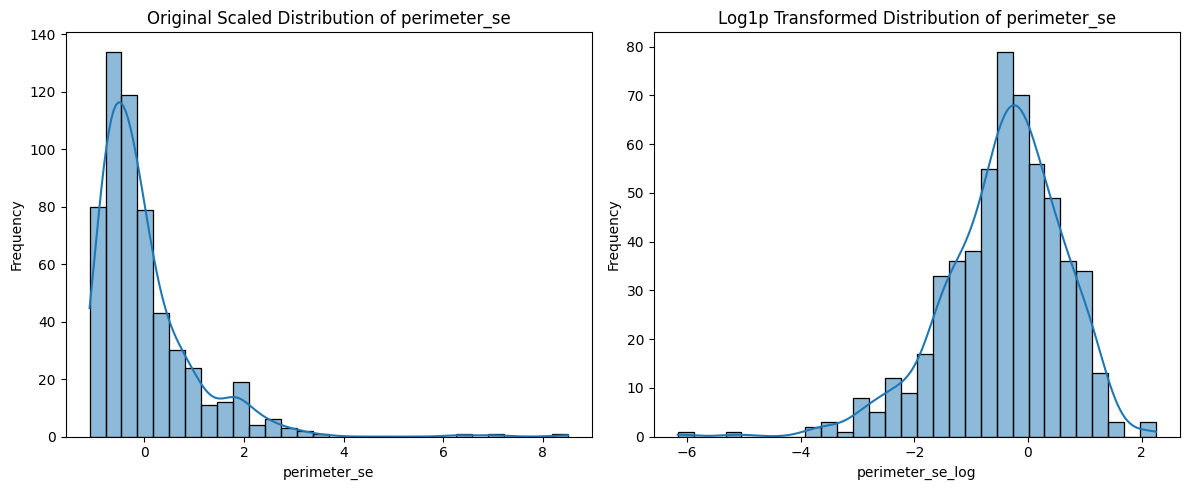

  Skewness of original scaled 'perimeter_se': 2.95
  Skewness of log1p transformed 'perimeter_se': -0.88

Processing feature: 'radius_se'


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


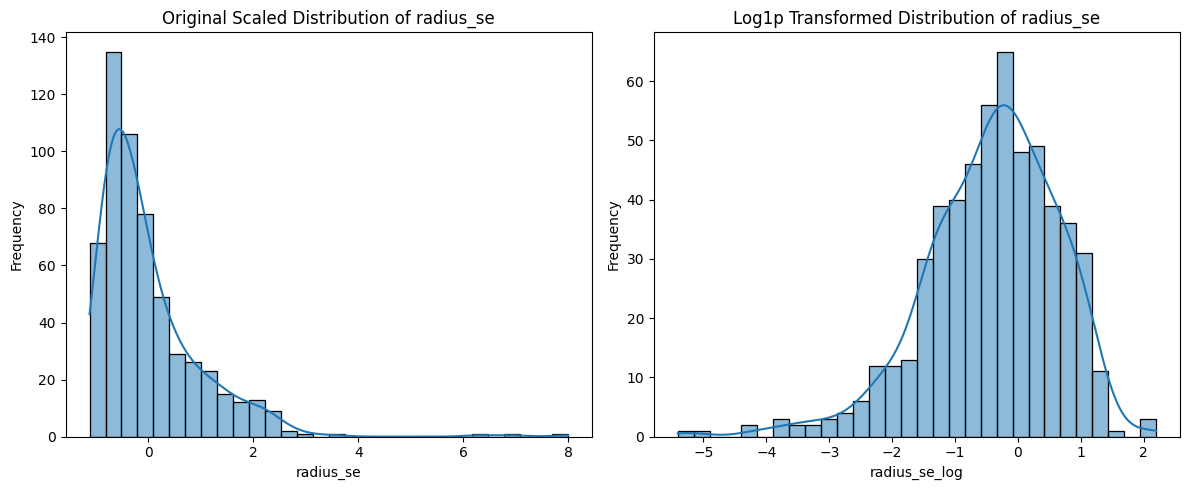

  Skewness of original scaled 'radius_se': 2.66
  Skewness of log1p transformed 'radius_se': -0.86

Processing feature: 'smoothness_se'


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


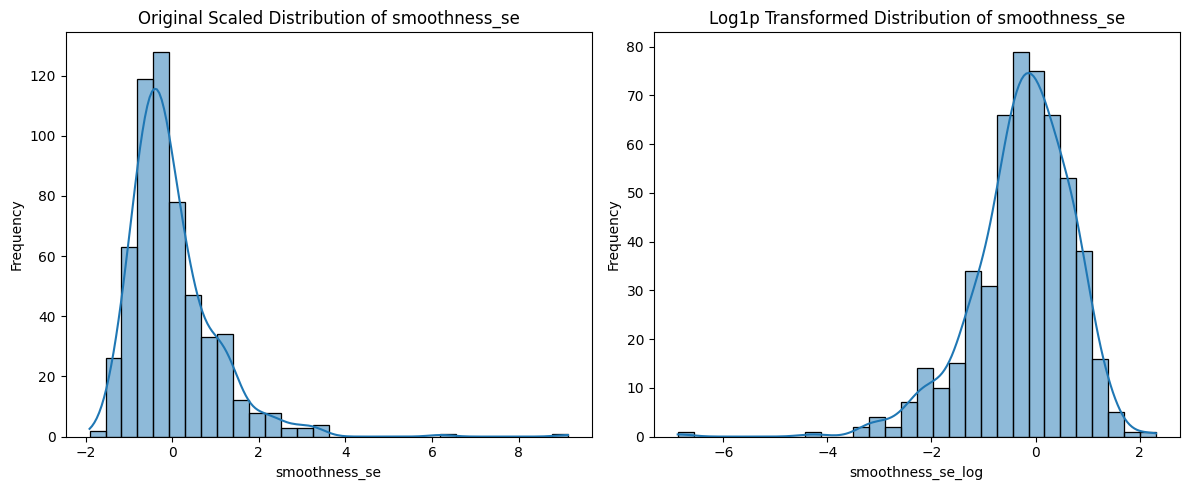

  Skewness of original scaled 'smoothness_se': 2.52
  Skewness of log1p transformed 'smoothness_se': -1.25

Processing feature: 'symmetry_se'


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


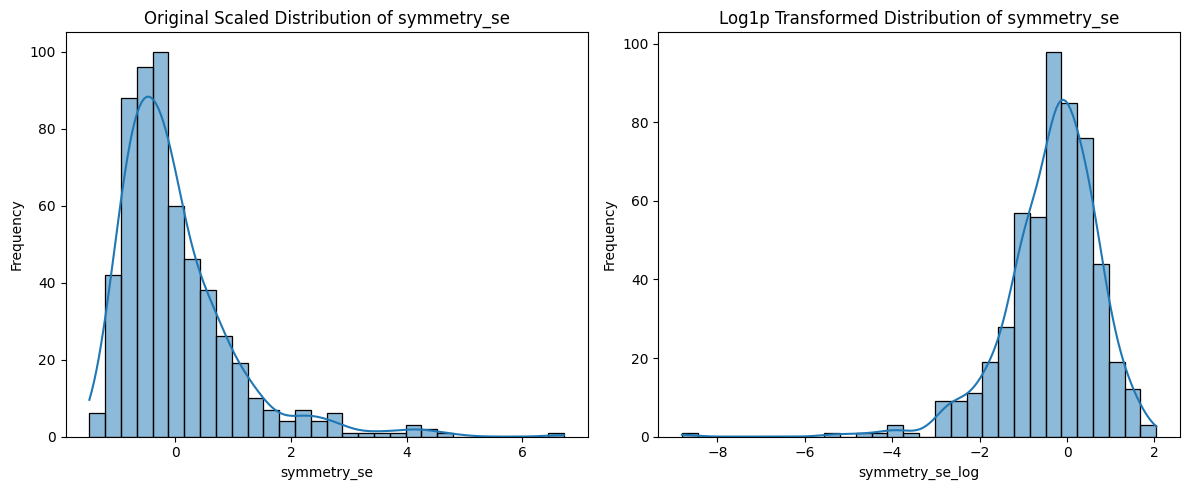

  Skewness of original scaled 'symmetry_se': 2.16
  Skewness of log1p transformed 'symmetry_se': -1.69

--- Feature transformations for other highly skewed features demonstrated. ---


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported

print("\n--- Applying Feature Transformation (Log1p) to Other Highly Skewed Features ---")
print("This step identifies and transforms additional highly skewed features using log1p.")
print("The goal is to make their distributions more symmetrical, which can benefit some models.")

# Identify other highly skewed features based on previous skewness output (skewness > ~2)
# Exclude 'area_se' as it was already demonstrated.
highly_skewed_features = [
    'area_se',
    'concavity_se',
    'fractal_dimension_se',
    'perimeter_se',
    'radius_se',
    'smoothness_se',
    'symmetry_se'
]

# Create copies of the scaled DataFrames to apply transformations.
# This ensures you can decide whether to keep these transformations or not.
X_train_transformed_multiple = X_train_resampled_scaled.copy()
X_test_transformed_multiple = X_test_scaled.copy()

for feature in highly_skewed_features:
    if feature in X_train_transformed_multiple.columns:
        print(f"\nProcessing feature: '{feature}'")

        # Apply log1p transformation (log(1+x)).
        # It's important that (1 + value) is positive for log.
        # For StandardScaler output, values around -3 to 3 are common, so (1+x) is usually positive.
        # If your data can contain values <= -1 after scaling, consider adjusting or using Yeo-Johnson/Box-Cox.
        X_train_transformed_multiple[feature + '_log'] = np.log1p(X_train_transformed_multiple[feature])
        X_test_transformed_multiple[feature + '_log'] = np.log1p(X_test_transformed_multiple[feature])

        # Plot original vs. transformed distribution for visual comparison
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        sns.histplot(X_train_transformed_multiple[feature], kde=True, bins=30)
        plt.title(f'Original Scaled Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')

        plt.subplot(1, 2, 2)
        sns.histplot(X_train_transformed_multiple[feature + '_log'], kde=True, bins=30)
        plt.title(f'Log1p Transformed Distribution of {feature}')
        plt.xlabel(f'{feature}_log')
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

        # Print skewness before and after
        print(f"  Skewness of original scaled '{feature}': {X_train_resampled_scaled[feature].skew():.2f}")
        print(f"  Skewness of log1p transformed '{feature}': {X_train_transformed_multiple[feature + '_log'].skew():.2f}")
    else:
        print(f"  Feature '{feature}' not found in the DataFrame. Skipping.")

print("\n--- Feature transformations for other highly skewed features demonstrated. ---")

# **Observations from Feature Transformations:**
**Significant Skewness Reduction:** For every feature, the log1p transformation has drastically reduced the positive skewness:

area_se: 4.81 → 0.68

concavity_se: 5.30 → -0.85

fractal_dimension_se: 4.23 → -0.93

perimeter_se: 2.95 → -0.88

radius_se: 2.66 → -0.86

smoothness_se: 2.52 → -1.25

symmetry_se: 2.16 → -1.69

This confirms that the transformation has made these distributions much more symmetrical and closer to a normal distribution.

**Negative Skewness After Transformation:**

For several features (e.g., concavity_se, fractal_dimension_se, perimeter_se, radius_se, smoothness_se, symmetry_se), the skewness became negative after transformation. This suggests an "over-transformation" for these features using log1p, or that the transformation was applied to scaled data that had a different range. While still more symmetrical than the original, perfectly symmetrical distributions have a skewness close to 0.

--- Step 5: Principal Component Analysis (PCA) - Optional Dimensionality Reduction ---
PCA is useful for reducing the number of features while retaining most of the variance,
especially when you have a high number of features and significant multicollinearity.


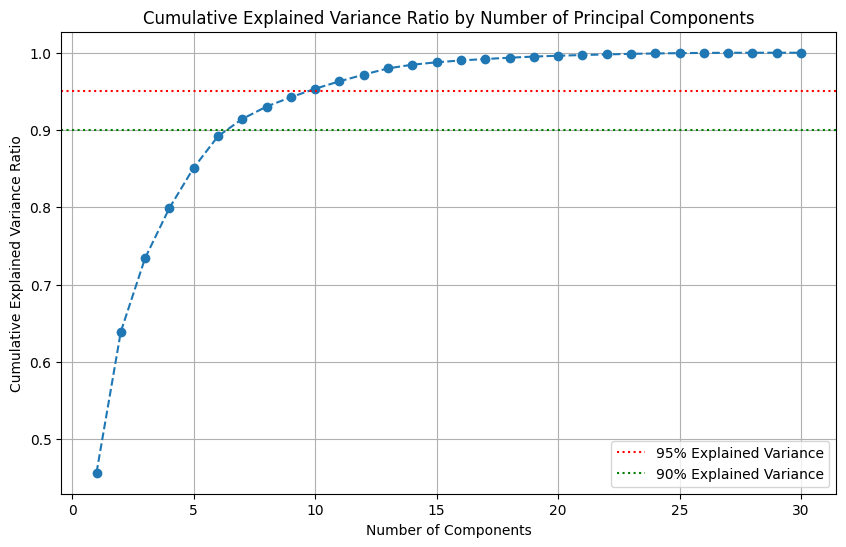


Number of components to explain at least 95% of variance: 10

Original number of features: 30
Number of principal components selected: 10
Shape of X_train after PCA: (570, 10)
Shape of X_test after PCA: (114, 10)

PCA applied. You can now use X_train_pca and X_test_pca for model training.
This step can help with multicollinearity and potentially improve model performance or interpretability.


In [42]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd # Ensure pandas is imported

print("--- Step 5: Principal Component Analysis (PCA) - Optional Dimensionality Reduction ---")
print("PCA is useful for reducing the number of features while retaining most of the variance,")
print("especially when you have a high number of features and significant multicollinearity.")

# It's crucial to apply PCA on scaled data.
# We will use X_train_resampled_scaled and X_test_scaled from the scaling step.

# First, let's analyze how much variance each component explains
pca_full = PCA()
pca_full.fit(X_train_resampled_scaled)

# Plot explained variance ratio to help decide the number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), pca_full.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance Ratio by Number of Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle=':', label='95% Explained Variance')
plt.axhline(y=0.90, color='g', linestyle=':', label='90% Explained Variance')
plt.legend(loc='lower right')
plt.show()

# Find the number of components for a desired explained variance (e.g., 95%)
n_components_95 = np.where(pca_full.explained_variance_ratio_.cumsum() >= 0.95)[0][0] + 1
print(f"\nNumber of components to explain at least 95% of variance: {n_components_95}")

# Apply PCA with the chosen number of components
pca_final = PCA(n_components=n_components_95) # Or you can choose a fixed number, e.g., 5, 10
X_train_pca = pca_final.fit_transform(X_train_resampled_scaled)
X_test_pca = pca_final.transform(X_test_scaled) # Transform test set using the *fitted* PCA

print(f"\nOriginal number of features: {X_train_resampled_scaled.shape[1]}")
print(f"Number of principal components selected: {pca_final.n_components_}")
print(f"Shape of X_train after PCA: {X_train_pca.shape}")
print(f"Shape of X_test after PCA: {X_test_pca.shape}")

print("\nPCA applied. You can now use X_train_pca and X_test_pca for model training.")
print("This step can help with multicollinearity and potentially improve model performance or interpretability.")

# **Observations from PCA Output:**
**Effective Dimensionality Reduction:**

Original Features: You started with 30 features.

**PCA Components:** PCA has successfully reduced this to 10 principal components while retaining a significant amount of information.

This is a substantial reduction, making your model training potentially faster and less prone to issues arising from high dimensionality or multicollinearity.

**Variance Explained:**

Your analysis determined that 10 components are sufficient to explain at least 95% of the total variance in your dataset. This is a common and often good threshold, meaning you've captured most of the important information without needing all original features.

**Transformed Data Shapes:**

X_train is now (570, 10) and X_test is (114, 10). This indicates that both your training and testing datasets have been transformed into this new, lower-dimensional space.

**Visual Confirmation (Cumulative Explained Variance Plot):**

The plot clearly shows that the cumulative explained variance rises steeply for the first few components and then flattens out. The point where the curve crosses the 0.95 (95%) mark visually corresponds to approximately 10 components, confirming your numerical finding. This "elbow" or flattening point often guides the selection of components.

**Implications of PCA:**

**Handling Multicollinearity:** PCA creates new, uncorrelated features (principal components) from your original, often highly correlated features. This directly addresses the multicollinearity we observed in the heatmap, which can improve the stability and performance of certain models.

**Reduced Complexity:** A model trained on 10 components will be less complex than one trained on 30 features, potentially leading to faster training times and sometimes better generalization (less overfitting).

**Interpretability:** While beneficial for modeling, remember that principal components are linear combinations of your original features, making them less directly interpretable in real-world terms (e.g., "PC1 represents X amount of mean radius and Y amount of mean area," etc.).

